In [1]:
import cv2
import DetectCar as car
import numpy as np
import matplotlib.pyplot as plt

In [2]:
net = cv2.dnn.readNet("../myauto_project_data/model_data/yolov3-tiny.weights", "../myauto_project_data/model_data/yolov3-tiny.cfg")
classes = []
with open("../myauto_project_data/model_data/coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]

In [3]:
layer_names = net.getLayerNames()
outputlayers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]

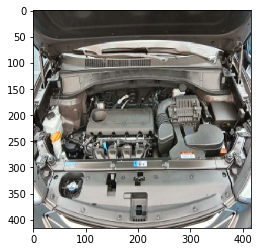

In [4]:
#TODO: change it to iter through every pic
img = cv2.imread("../myauto_project_data/images/1/9.jpg")
img = cv2.resize(img, (416,416))
# cv2.startWindowThread()
# cv2.imshow("random Image", img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
plt.imshow(img)

In [5]:
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0,0,0), True, crop=False)

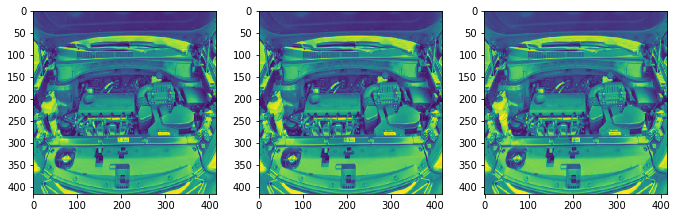

In [6]:
fig=plt.figure(figsize=(64, 64))
for b in blob:
    for n, img_blob in enumerate(b):
        fig.add_subplot(16,16, n+1)
        plt.imshow(img_blob)


In [7]:
net.setInput(blob)
outs = net.forward(outputlayers)

In [8]:
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            print("found", str(classes[class_id]), "with", confidence, "percent")

In [9]:
returnList = car.detect_car("../myauto_project_data/images/1/10.jpg")
returnList

AttributeError: module 'DetectCar' has no attribute 'detect_image'